https://www.kaggle.com/datasets/sudhanshu2198/processed-data-credit-score/code

In [16]:
import pandas as pd
import numpy as np
com = pd.read_csv('景点.csv')
com = com.drop(['标题链接','图片','bookbtn1','评分','rate','add','图片1','标记','时间'],axis=1)
com=pd.concat([com[com['类型']=='历史人文'],com[com['类型']=='自然生态']],axis=0)
com.rename(columns={'描述':'txt'},inplace=True)
com = com.dropna().reset_index().drop('index',axis=1)

mapping = {'历史人文':0,'自然生态':1}
com['类型'] = com['类型'].map(mapping)

import jieba
stop_word = pd.read_csv('停用词.csv',names=['w'],sep='\t',encoding='utf-8')
for i in range(len(com.txt)):
    com.txt[i]=(' '.join([w for w in jieba.cut(com.txt[i]) if w not in list(stop_word.w)]))
com=com[com['txt']!=''].reset_index().drop('index',axis=1)

df=pd.concat([com[com['类型']==0].sample(n=10000),com[com['类型']==1].sample(n=10000)],axis=0)
df = df.reindex(np.random.permutation(df.index))
df = df.reset_index().drop('index',axis=1)

C:\Users\YANGZH~1\AppData\Local\Temp/ipykernel_17396/3144576198.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com.txt[i]=(' '.join([w for w in jieba.cut(com.txt[i]) if w not in list(stop_word.w)]))


In [18]:
text=[]
for i in range(len(df.txt)):
    text.append(df.txt[i])
text

['10 积分 几个 次 够   有要 几个 字   25 积分 骗 打字 结束   够不够 缺字',
 '历史学 酱油',
 '小朋友 开心 体验 动物 乐趣',
 '寻根 问祖 黄帝陵 感受一下 祖先 风采 值得一看',
 '世界 第八 奇迹 坑 没完 博物馆',
 '早知 洽川 江南 \r\n 洽川 风景区 位于 渭南市 合阳县 城以 约 20 公里 处 黄河流域 河滨 温泉 湖泊 型 湿地 风景 极好 鸟语花香 面积 芦苇荡 茫茫 青山 温泉 内有 黄河流域 芦苇荡 湿地 保护区 白天鹅 丹顶鹤 黑鹳 大鸨 百余种 国家 二级 保护 动物 栖息 \r\n \r\n \r\n * * 泉 风景区 独特 一处 风景区 最为 分 * * 泉 又名 东鲤 瀵 伏鱼泉 位于 洽川 风景区 芦荡 之中',
 '说实话 两个 馆 转 有点累 充足 转 极地馆 用时 少 海洋馆',
 '诗情画意 古城 西安',
 '真心 六个 愉快 逛 5 小时 适合 小孩',
 '钟楼 外面 本地人',
 '值得 大自然 届 动物 亲临现场 秦岭 野生 动物园',
 '挺好玩 挺大 动物',
 '喜欢 动物 海洋生物 好看',
 '风景 登高 风光 美 太高 体力不支 太仓促',
 '华山 景色 美 人员 服务 不好 爱理不理',
 '没什么 好玩     喜欢   一级',
 '石门 十三 品 古 栈道 全景 汉中 红色 史诗 窥一而 知全 值得 一游',
 '壮观   不贵   值得',
 '人多 超级 文物 电视',
 '免费 春节 队伍 长 博物院 值得 陕西历史博物馆 人数 值得',
 '西安 打卡 白天 太晒 选择 晚上 登楼 暑期 人超 骑 自行车 城楼 转 一圈 小有 遗憾 夜景 美',
 '环境 差',
 '瀛湖 水质   素有 陕西 千岛湖 之称',
 '刚下 完雨 山 全是 雾 好看 骑马 很棒 吃饭 坑 价格 高 量 少 味道 一般般 推荐 天气 热 一大早 下午 4 点 太冷 回来',
 '值得 一游 时 永宁 门 段 好像 修缮 围着 完整',
 '北京 海洋馆 好玩 小孩子 行   大人 值得',
 '太大 完 适合 晚上 西安 确实 喜欢 灯光 秀',
 '泱泱大国 大秦 雄风 汉武 光辉 中国 自豪 … …',
 '气势磅礴',
 '..........

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
 

#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(max_features=100)
#该类会统计每个词语的tf-idf权值
tf_idf_transformer = TfidfTransformer()
#将文本转为词频矩阵并计算tf-idf
tf_idf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(text))
#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
weight = tf_idf.toarray()


In [20]:
X = weight
y = df['类型']

In [22]:
X.shape

(20000, 100)

In [8]:
# 使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(X, y)

In [27]:
df2=pd.concat([pd.DataFrame(X_smo),y],axis=1)
df2

,0,1,2,3,4,5,6,7,8,9,类型
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [11]:
df2.groupby(by='类型').count()

,0,1,2,3,4,5,6,7,8,9
类型,,,,,,,,,,
0,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [23]:
from sklearn.model_selection import train_test_split
import time
from sklearn.svm import SVC

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [8]:
from sklearn.model_selection import train_test_split
import time
from sklearn.svm import SVC

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#训练初步模型
model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr',degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)

T1 = time.time()
model.fit(X_train,Y_train)
T2 = time.time()

print('训练时间:%s毫秒' % ((T2 - T1)*1000))

predictions = model.predict(X_test)


print(pd.DataFrame([predictions,Y_test]))

训练时间:40329.70309257507毫秒
   0     1     2     3     4     5     6     7     8     9     ...  5990  \
0     1     1     1     0     1     1     0     0     1     1  ...     1   
1     1     1     0     0     1     1     1     0     0     0  ...     0   

   5991  5992  5993  5994  5995  5996  5997  5998  5999  
0     1     0     1     1     1     1     1     0     0  
1     0     0     0     0     0     1     1     0     0  

[2 rows x 6000 columns]


In [ ]:
#评价
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)        # 0.9298245614035088

In [30]:
from sklearn.metrics import accuracy_score,precision_score, \
recall_score,f1_score,cohen_kappa_score
 
print('准确率为：', 
accuracy_score(Y_test,predictions))      
print('精确率为：',
      precision_score(Y_test,predictions,average='weighted'))
print('召回率为：',
      recall_score(Y_test,predictions,average='weighted'))
print('F1值为：',
      f1_score(Y_test,predictions,average='micro'))
print('Cohen’s Kappa系数为：',
      cohen_kappa_score(Y_test,predictions))

准确率为： 0.7621666666666667
精确率为： 0.7793423312569077
召回率为： 0.7621666666666667
F1值为： 0.7621666666666667
Cohen’s Kappa系数为： 0.52376809898148


In [36]:
#交叉验证
def svm_cross_validation(X_train,Y_train):    
    from sklearn.model_selection import GridSearchCV    
    from sklearn.svm import SVC    
    model = SVC(kernel='rbf', probability=True)    
    param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}    
    grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)    
    grid_search.fit(X_train,Y_train)    
    best_parameters = grid_search.best_estimator_.get_params()    
    for para, val in list(best_parameters.items()):    
        print(para, val)    
    model = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)    
    model.fit(X_train,Y_train)    
    return model

model=svm_cross_validation(X_train,Y_train)

predictions = model.predict(X_test)
print(predictions)
print(accuracy_score(Y_test,predictions))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
C 0.001
break_ties False
cache_size 200
class_weight None
coef0 0.0
decision_function_shape ovr
degree 3
gamma 0.001
kernel rbf
max_iter -1
probability True
random_state None
shrinking True
tol 0.001
verbose False
[1 1 1 ... 1 1 1]
0.49233333333333335


In [24]:
X_train.shape

(14000, 10)

In [50]:
# 决策树
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
import time

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)


clf = DecisionTreeClassifier(random_state=3) # 初始化

T1 = time.time()
clf = clf.fit(X_train,Y_train) # 拟合
T2 = time.time()
print('训练时间:',T2-T1)
score_ = clf.score(X_test, Y_test) # 验证集查看得分，这个得分好像就是分类的准确率

# 可以输入数据送到训练好的模型里，输出预测的类
y_pred = clf.predict(X_test)

#评价
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)        # 0.9298245614035088

训练时间: 0.5905194282531738


0.7451666666666666

In [51]:
clf.score(X_train,Y_train)

0.8271428571428572

In [49]:
X_train.shape

(16000, 100)

In [48]:
Y_train.shape

(14000,)

In [52]:
print('精确率为：',
      precision_score(Y_test,y_pred,average='weighted'))
print('召回率为：',
      recall_score(Y_test,y_pred,average='weighted'))
print('F1值为：',
      f1_score(Y_test,y_pred,average='micro'))
print('Cohen’s Kappa系数为：',
      cohen_kappa_score(Y_test,y_pred))

精确率为： 0.7525106437982434
召回率为： 0.7451666666666666
F1值为： 0.7451666666666665
Cohen’s Kappa系数为： 0.49072230831695873


In [22]:
y.sum()

10000

Training accuracy: 0.6742857142857143
Test accuracy: 0.6608333333333334
Precision: 0.7550
Recall: 0.6608
F1: 0.6271
[[2878  108]
 [1927 1087]]


C:\Users\YANGZH~1\AppData\Local\Temp/ipykernel_24536/641765829.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('destree_mat.pdf',dpi=300,bbox='tight')


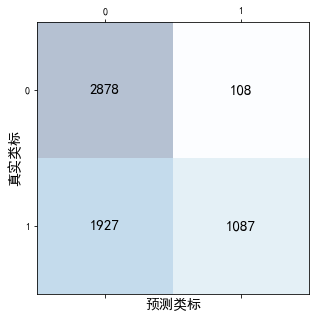

In [34]:
# 以熵作为不纯度度量标准
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, random_state = 3)
tree.fit(X_train, Y_train)
# 打印训练集精确度
print('Training accuracy:', tree.score(X_train, Y_train))
# 打印测试集精确度
print('Test accuracy:', tree.score(X_test, Y_test))
# 获取模型的准确率和召回率
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = tree.predict(X_test)
# 准确率
print('Precision: %.4f' % precision_score(y_true=Y_test, y_pred=y_pred,average='weighted'))
# 召回率
print('Recall: %.4f' % recall_score(y_true=Y_test, y_pred=y_pred,average='weighted'))
# F1
print('F1: %.4f' % f1_score(y_true=Y_test, y_pred=y_pred,average='weighted'))

# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
y_pred = tree.predict(X_test)
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print(confmat)
# 将混淆矩阵可视化
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=15)

plt.xlabel('预测类标',fontsize=14)
plt.ylabel('真实类标',fontsize=14)
plt.savefig('destree_mat.pdf',dpi=300,bbox='tight')
plt.show()


In [29]:
# 贝叶斯
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score # 交叉验证


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 模型实例化
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()
# 使用默认参数

# 训练模型
T1 = time.time()
bnb.fit(X_train,y_train)
T2 = time.time()
print(T2-T1,'s')

T1 = time.time()
mnb.fit(X_train,y_train)
T2 = time.time()
print(T2-T1,'s')

T1 = time.time()
gnb.fit(X_train,y_train)
T2 = time.time()
print(T2-T1)

# 评估模型
# 分别看一下三个模型,在训练集和测试集的分数
print('bnb模型训练集分数:',bnb.score(X_train,y_train))
print('bnb模型测试集分数:',bnb.score(X_test,y_test))
print('-'*40)
print('mnb模型训练集分数:',mnb.score(X_train,y_train))
print('mnb模型测试集分数:',mnb.score(X_test,y_test))
print('-'*40)
print('gnb模型训练集分数:',gnb.score(X_train,y_train))
print('gnb模型测试集分数:',gnb.score(X_test,y_test))


0.03054046630859375 s
0.016170740127563477 s
0.03402400016784668
bnb模型训练集分数: 0.7630714285714286
bnb模型测试集分数: 0.7683333333333333
----------------------------------------
mnb模型训练集分数: 0.7662857142857142
mnb模型测试集分数: 0.7658333333333334
----------------------------------------
gnb模型训练集分数: 0.7555
gnb模型测试集分数: 0.7565


https://blog.csdn.net/peiwang245/article/details/82193702

In [54]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression as LR         
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV  # 网格搜索

# 把整体数据集进行切分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 40)
#在l2范式下，判断C和solver的最优值
p = {
    'C':list(np.linspace(0.05,1,19)),
    'solver':['liblinear','sag','newton-cg','lbfgs']}

model = LR(penalty='l2',max_iter=1000)
GS = GridSearchCV(model,p,cv=5)
GS.fit(X_train,y_train)
#输出最优参数
GS.best_params_


{'C': 0.7361111111111112, 'solver': 'newton-cg'}

In [38]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression        
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import time

# 把整体数据集进行切分
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 40)

# 用最优参数训练
log_model = LogisticRegression(penalty='l2',C=0.736, solver="newton-cg", max_iter=1000)
T1=time.time()
log_model.fit(X_train,Y_train)
T2=time.time()
print(T2-T1)


0.376568078994751


In [39]:
#逻辑回归评价
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import accuracy_score,precision_score, \
recall_score,f1_score,cohen_kappa_score
pred_test = log_model.predict(X_test)
acu = accuracy_score(Y_test, pred_test)  # 准确率
recall = recall_score(Y_test, pred_test, average="macro")  # 召回率
print(acu,recall)

print('精确率为：',
      precision_score(Y_test,pred_test,average='weighted'))
print('召回率为：',
      recall_score(Y_test,pred_test,average='weighted'))
print('F1值为：',
      f1_score(Y_test,pred_test,average='micro'))
print('Cohen’s Kappa系数为：',
      cohen_kappa_score(Y_test,pred_test))

0.7555 0.7558762115436155
精确率为： 0.7599629988163978
召回率为： 0.7555
F1值为： 0.7554999999999998
Cohen’s Kappa系数为： 0.5113586627415477


In [26]:
from sklearn.linear_model import LogisticRegression        
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import time
def log(x_train, y_train, x_test, y_test, multi_class, solver):  # multi_class: {ovr','multinomial'}, solver: {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}
    log_model = LogisticRegression(multi_class=multi_class, solver=solver, max_iter=1000)
    log_model.fit(x_train,y_train)
    pred_test = log_model.predict(x_test)
    acu = accuracy_score(y_test, pred_test)
    recall = recall_score(y_test, pred_test, average="macro")
    return acu, recall

def run_log_reg(times, test_size):
    result = {"times":[],
              "multi_class":[],
              "solver":[],
              "acu":[],
              "recall":[]}
    for i in range(times):
        x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=test_size)
        for multi_class in ['ovr','multinomial']:
            for solver in ['newton-cg', 'liblinear', 'lbfgs', 'sag', 'saga']:
                if (multi_class == 'multinomial' and solver == 'liblinear'):
                    continue
                acu, recall = log(x_train, y_train, x_test, y_test, multi_class, solver)
                result["times"].append(i)
                result["multi_class"].append(multi_class)
                result["solver"].append(solver)
                result["acu"].append(acu)
                result["recall"].append(recall)
    df_re =  pd.DataFrame(result)
    ave_acu = df_re.groupby(["multi_class", "solver"])["acu"].mean()
    ave_recall = df_re.groupby(["multi_class", "solver"])["recall"].mean()
    return ave_acu, ave_recall
run_log_reg(3,0.3)

(multi_class  solver   
 multinomial  lbfgs        0.759222
              newton-cg    0.759222
              sag          0.759222
              saga         0.759222
 ovr          lbfgs        0.759722
              liblinear    0.759722
              newton-cg    0.759722
              sag          0.759722
              saga         0.759722
 Name: acu, dtype: float64,
 multi_class  solver   
 multinomial  lbfgs        0.759089
              newton-cg    0.759089
              sag          0.759089
              saga         0.759089
 ovr          lbfgs        0.759586
              liblinear    0.759586
              newton-cg    0.759586
              sag          0.759586
              saga         0.759586
 Name: recall, dtype: float64)

https://blog.csdn.net/qq_51205385/article/details/127785470

In [34]:
#KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 创建分类器
clf = KNeighborsClassifier(n_neighbors=3)

# 把整体数据集进行切分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 40)

# 训练数据
T1 = time.time()
clf.fit(X_train,y_train)
T2 = time.time()
print(T2-T1)

# 测试数据
test_predictions = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))


0.0
Accuracy: 0.7265
MSE: 0.2735


In [33]:
print('准确率为：', 
      accuracy_score(y_test, test_predictions)) 
print('精确率为：',
      precision_score(y_test, test_predictions))
print('召回率为：',
      recall_score(y_test, test_predictions))
print('F1值为：',
      f1_score(y_test, test_predictions))


准确率为： 0.7265
精确率为： 0.682261208576998
召回率为： 0.8305084745762712
F1值为： 0.74912092952148
